In [21]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [22]:
df = pd.read_csv('360T.csv')
df

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,2533,31348,2089,218,1777,46,266,2266,38,...,583,1328,108,69,136,46,1.02,2,1,0
1,32695,2179,26253,1750,212,1726,48,212,1814,34,...,575,1344,105,32,83,48,1.00,1,1,0
2,32655,2177,26396,1759,212,1654,41,212,1701,30,...,578,1270,120,21,76,41,1.00,1,1,0
3,33541,2236,26612,1774,213,1695,50,214,1741,38,...,586,1316,112,1,82,50,1.00,1,1,0
4,32925,2195,26472,1764,213,1750,44,213,1805,35,...,586,1375,115,1,83,44,1.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,2201,26446,1763,212,1654,45,213,1674,37,...,579,1273,126,1,81,45,1.00,1,1,1
2332,33072,2204,26372,1758,211,1685,39,212,1721,39,...,573,1307,106,1,86,39,1.00,1,1,1
2333,32555,2170,26043,1736,210,1667,48,210,1716,37,...,567,1289,117,1,77,48,1.00,1,1,1
2334,33033,2202,26395,1759,212,1714,47,213,1722,38,...,581,1335,92,1,79,46,1.00,1,1,1


(array([  85., 2251.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

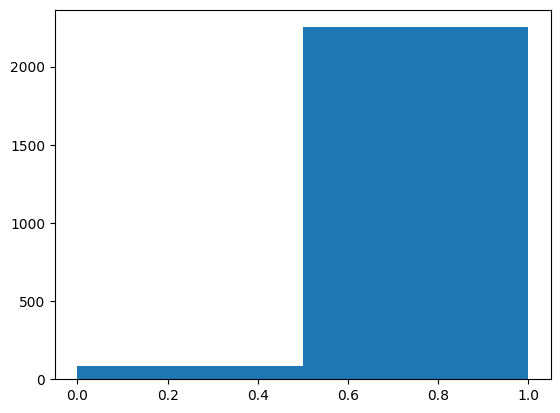

In [23]:
plt.hist(df['class'],bins = 2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    test_size=0.2, random_state=79, stratify = df.iloc[:,-1])

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Обучаем скейлер на X_train и применяем преобразование
X_train_scaled = sc.fit_transform(X_train)

# Преобразовываем X_test
X_test_scaled = sc.transform(X_test)

In [26]:
mlp = MLPClassifier(random_state=79, 
                    hidden_layer_sizes=(27,10), # Используем три скрытых слоя и укажем число нейронов в каждом
                    activation='logistic', # Определим функцию активации
                    max_iter=1000, # Максимальное число эпох обучения
                   )
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(27, 10), max_iter=1000,
              random_state=79)

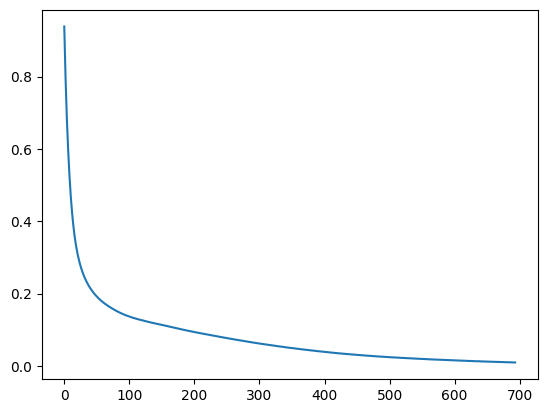

In [27]:
plt.plot(mlp.loss_curve_)

In [28]:
y_mlp_pred = mlp.predict(X_test_scaled)
y_mlp_pred
print(classification_report(y_test, y_mlp_pred, digits=3))

              precision    recall  f1-score   support

           0      0.733     0.647     0.688        17
           1      0.987     0.991     0.989       451

    accuracy                          0.979       468
   macro avg      0.860     0.819     0.838       468
weighted avg      0.978     0.979     0.978       468



In [36]:
X_test.head()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
2090,32988,2199,26206,1747,212,1714,45,212,1771,34,...,8645,576,1335,122,0,84,45,0.99,1,0
1206,62904,2859,50652,2302,262,2648,47,262,2736,38,...,19257,875,2270,137,1,81,47,1.00,1,1
1341,34574,2304,27786,1852,221,1801,47,225,1869,36,...,9477,632,1422,99,1,84,47,0.28,1,0
223,31644,2109,25453,1696,207,1639,30,205,1649,35,...,8490,566,1263,99,0,81,30,0.21,1,0
940,32583,2172,26291,1752,211,1698,29,213,1765,37,...,8927,595,1322,113,4,78,29,0.19,1,0


In [38]:
df1 = pd.read_csv('DL_Task_2_test_file_40.csv')
df1

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,33017,2201,26393,1759,213,1728,46,213,1810,38,...,8769,585,1346,115,1,80,44,1.0,1,1


In [39]:
# Выбираем произвольный объект из начального набора данных
test_obj = df1.loc[[0]]

# Не забываем масштабировать признаки тестового объекта 
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [0]


In [42]:
df2 = pd.read_csv('DL_Task_2_test_file_87.csv')
df2

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,31867,2124,25278,1685,206,1580,29,204,1595,34,...,8433,562,1196,119,20,84,29,0.13,1,0


In [43]:
test_obj = df2.loc[[0]]

# Не забываем масштабировать признаки тестового объекта 
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [1]


In [44]:
df3 = pd.read_csv('DL_Task_2_test_file_122.csv')
df3

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,31673,2111,25174,1678,205,1626,28,204,1646,35,...,8408,561,1248,112,2,87,28,0.22,1,0


In [45]:
test_obj = df3.loc[[0]]

# Не забываем масштабировать признаки тестового объекта 
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [1]


In [46]:
df4 = pd.read_csv('DL_Task_2_test_file_122.csv')
df4

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,31673,2111,25174,1678,205,1626,28,204,1646,35,...,8408,561,1248,112,2,87,28,0.22,1,0


In [47]:
test_obj = df4.loc[[0]]

# Не забываем масштабировать признаки тестового объекта 
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [1]
